Loading MNIST digits dataset...
Dataset shape: (1797, 64)
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]
PCA explained variance ratio: [0.14890594 0.13618771]
Training set size: 1437
Test set size: 360

Training models...
Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Decision Tree...
Training Random Forest...
Training SVM...
Training SVM...
Training KNN...
Training KNN...

MODEL ACCURACY RESULTS
Logistic Regression : 0.9583
Decision Tree       : 0.8250
Random Forest       : 0.9611
SVM                 : 0.9917
KNN                 : 0.9833

MODEL ACCURACY RESULTS
Logistic Regression : 0.9583
Decision Tree       : 0.8250
Random Forest       : 0.9611
SVM                 : 0.9917
KNN                 : 0.9833


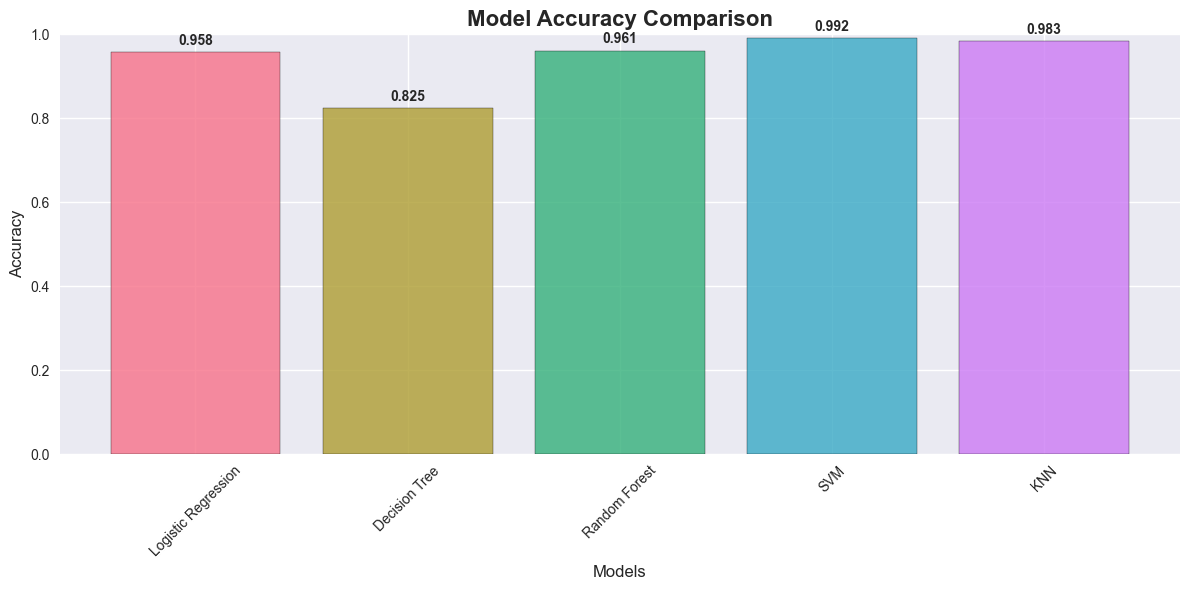

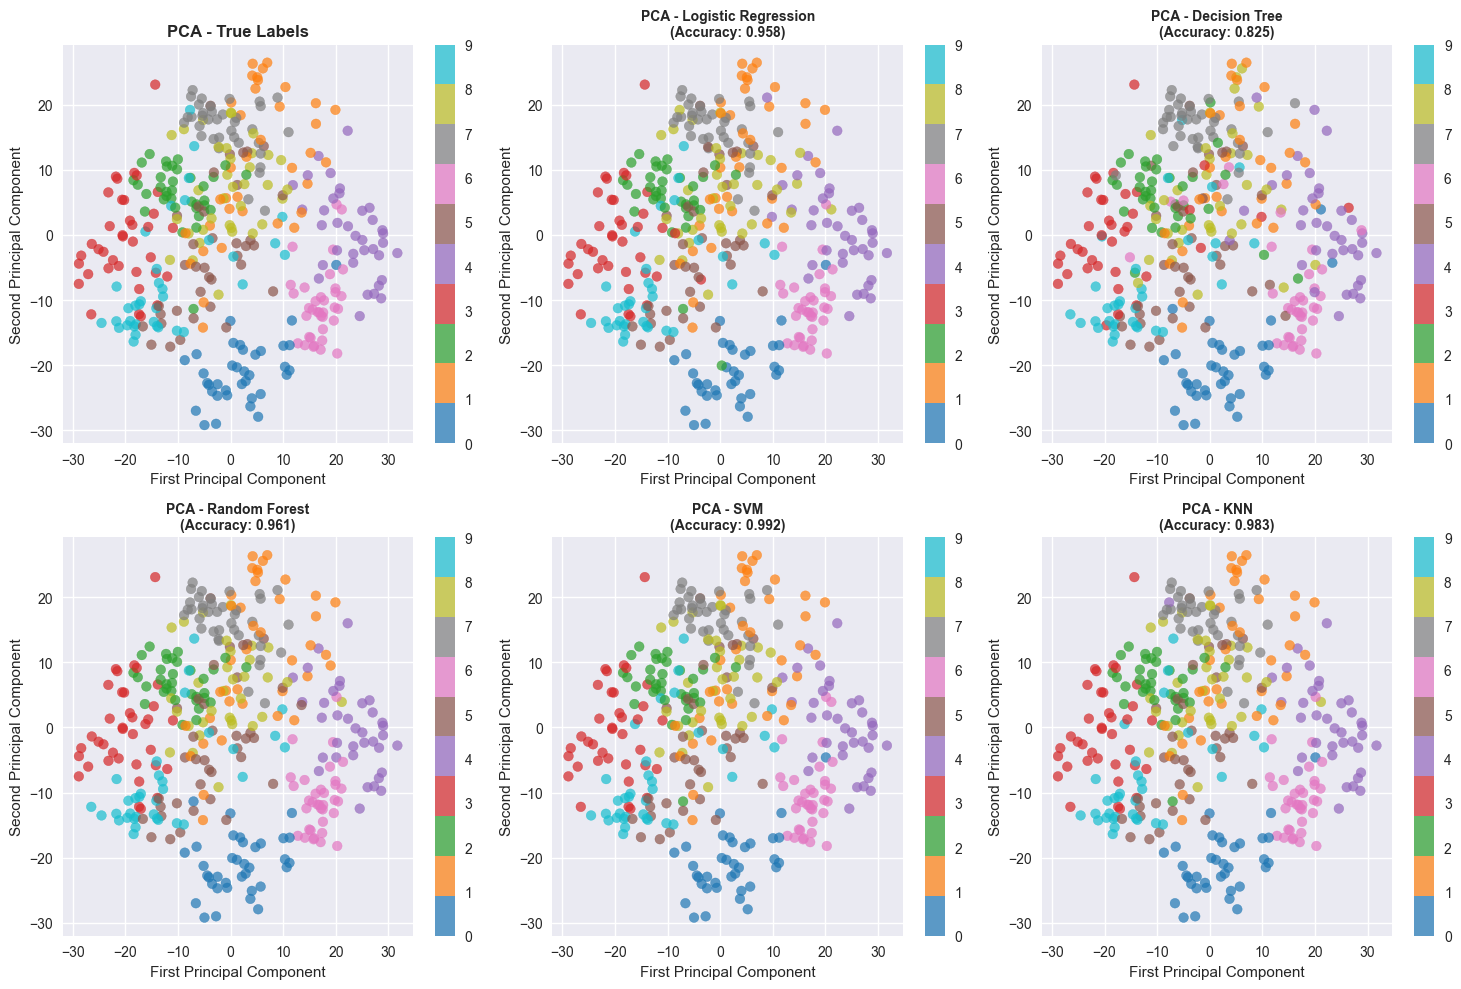


Generating t-SNE visualizations...


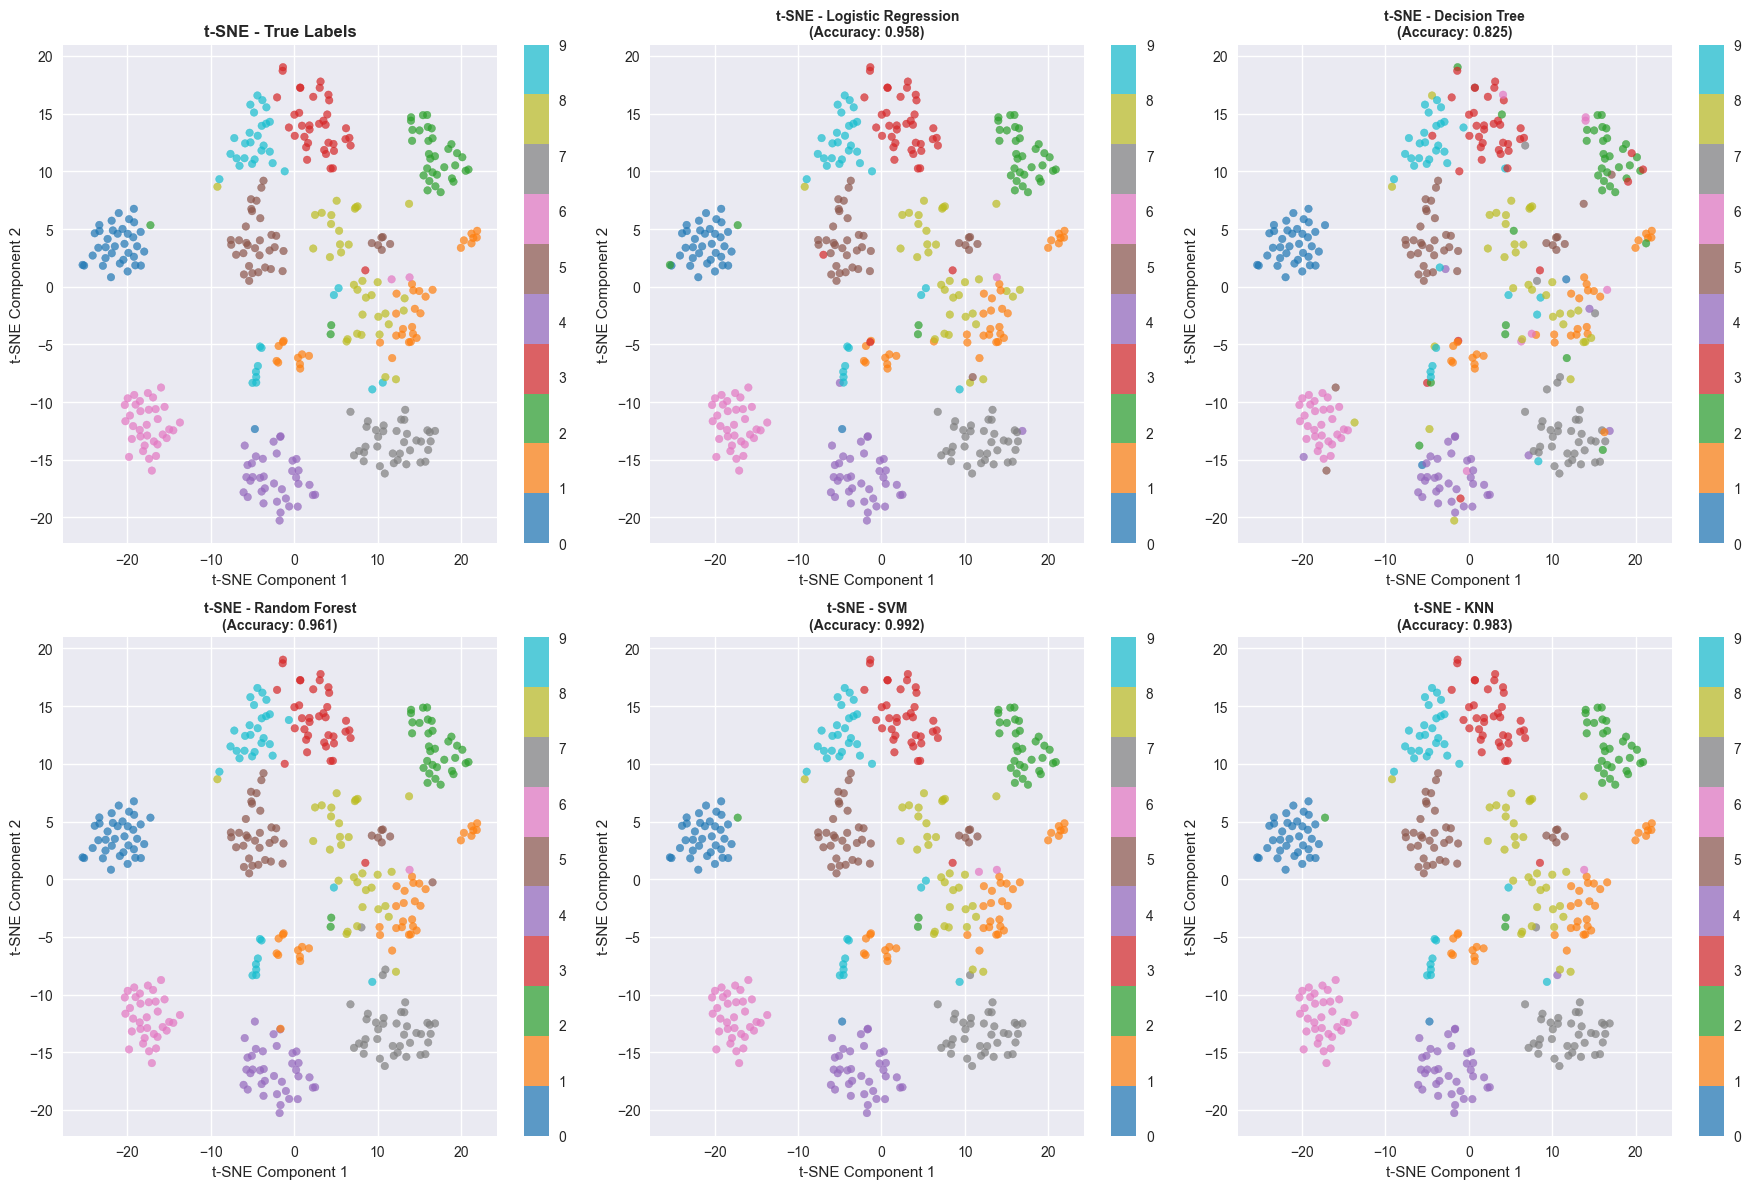

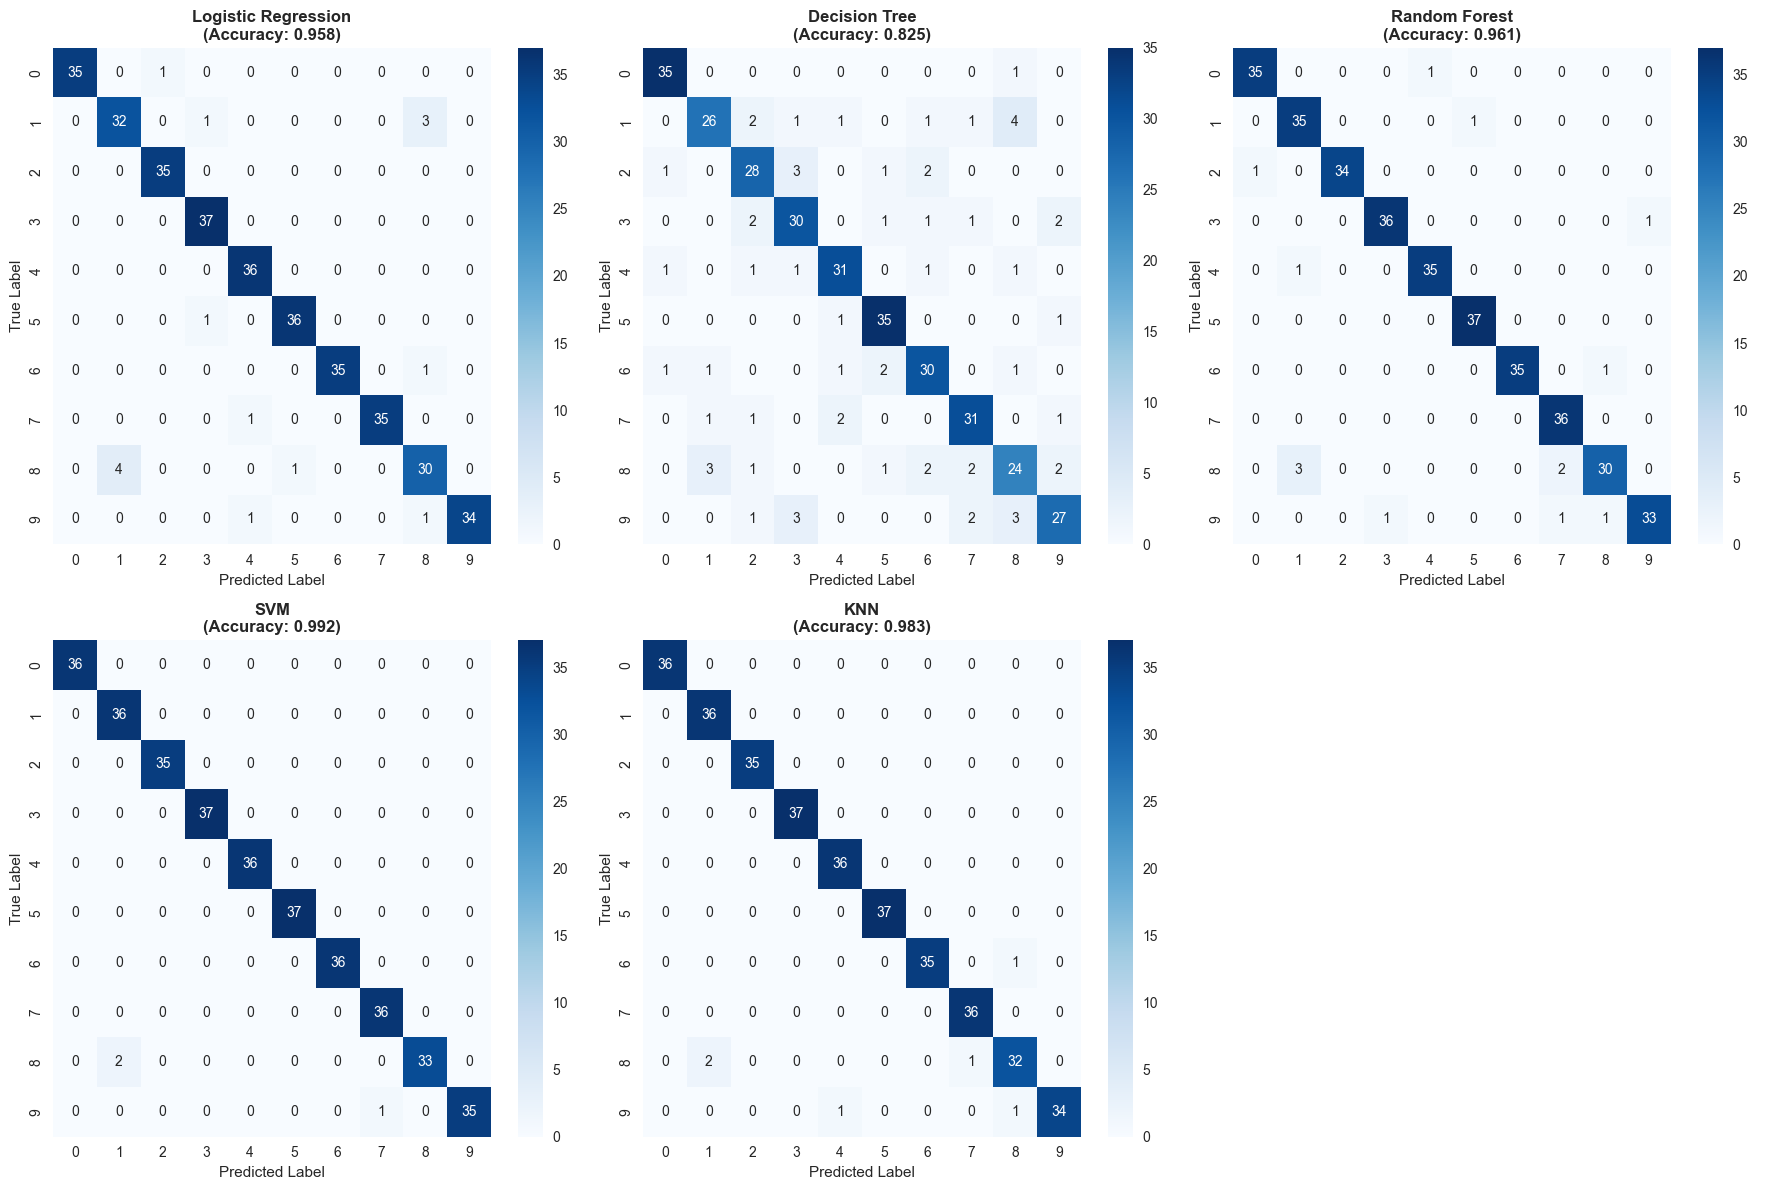


DETAILED CLASSIFICATION REPORTS

Logistic Regression:
-------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.89      0.89      0.89        36
           2       0.97      1.00      0.99        35
           3       0.95      1.00      0.97        37
           4       0.95      1.00      0.97        36
           5       0.97      0.97      0.97        37
           6       1.00      0.97      0.99        36
           7       1.00      0.97      0.99        36
           8       0.86      0.86      0.86        35
           9       1.00      0.94      0.97        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360


Decision Tree:
-------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.84    

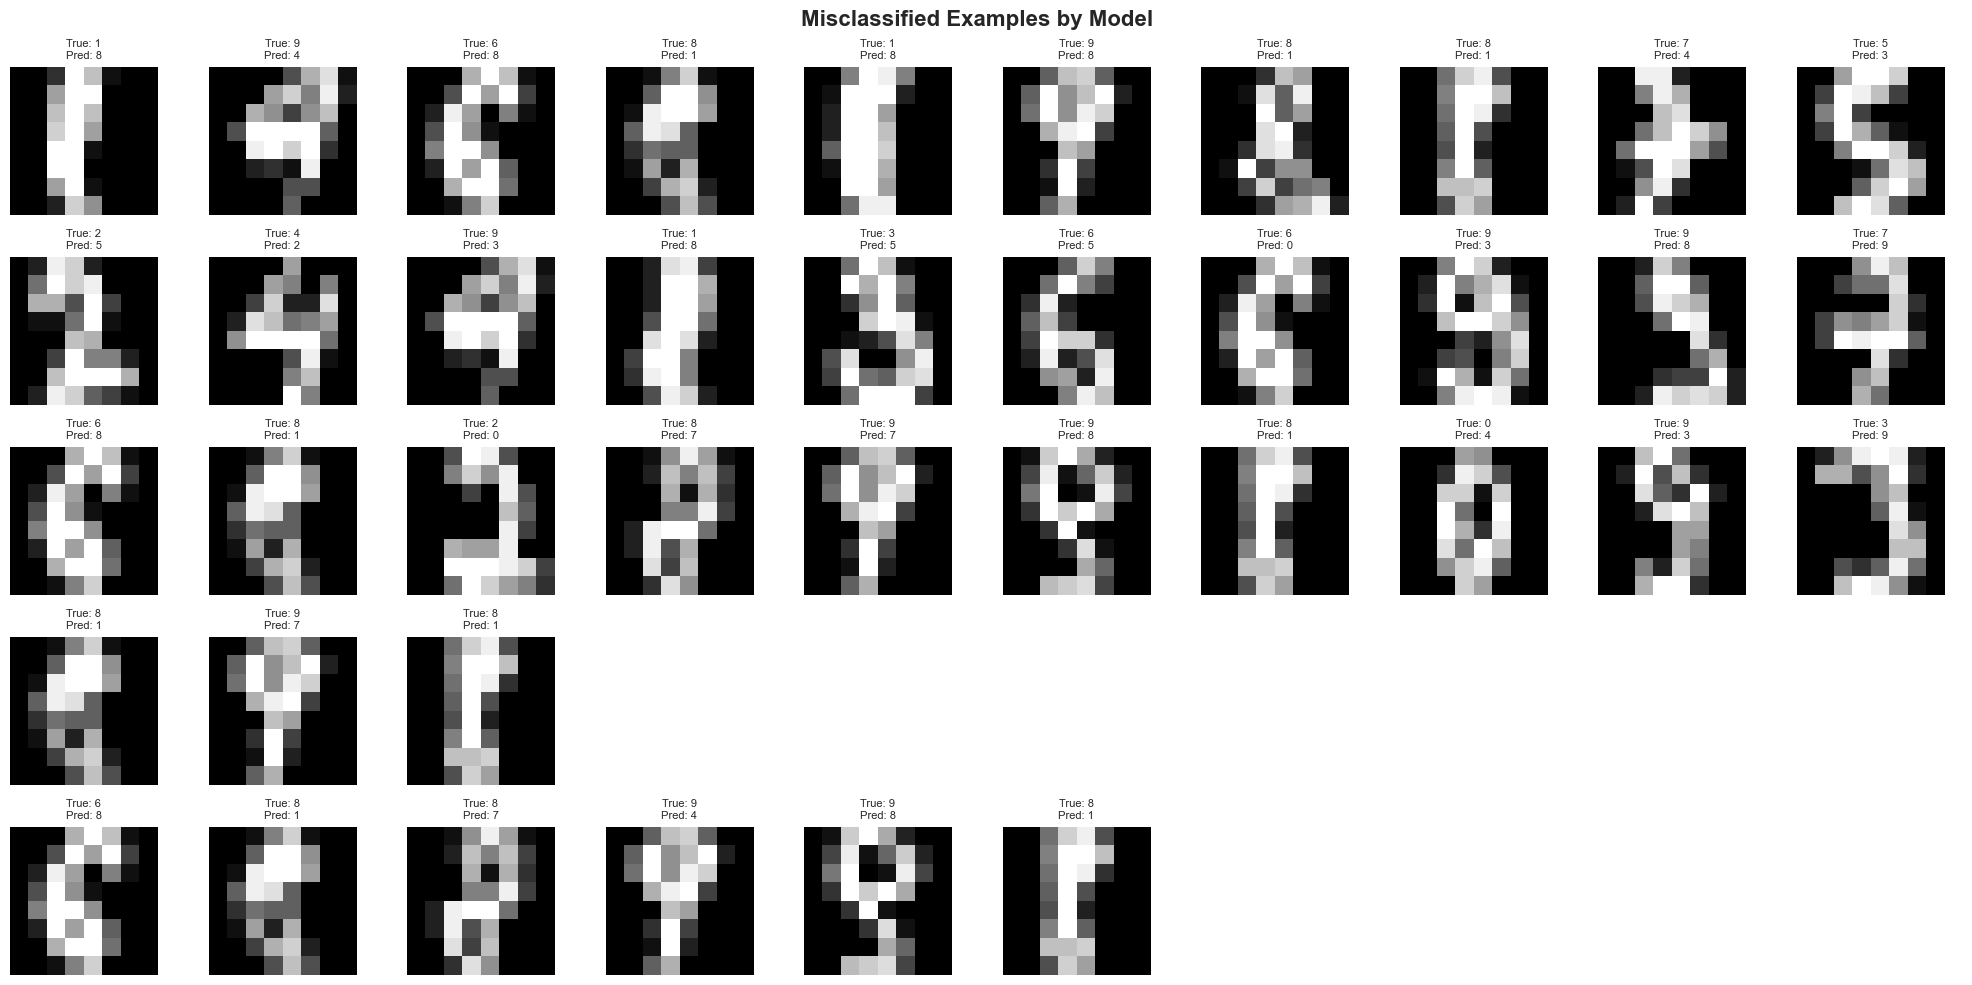


Showing sample images from dataset...


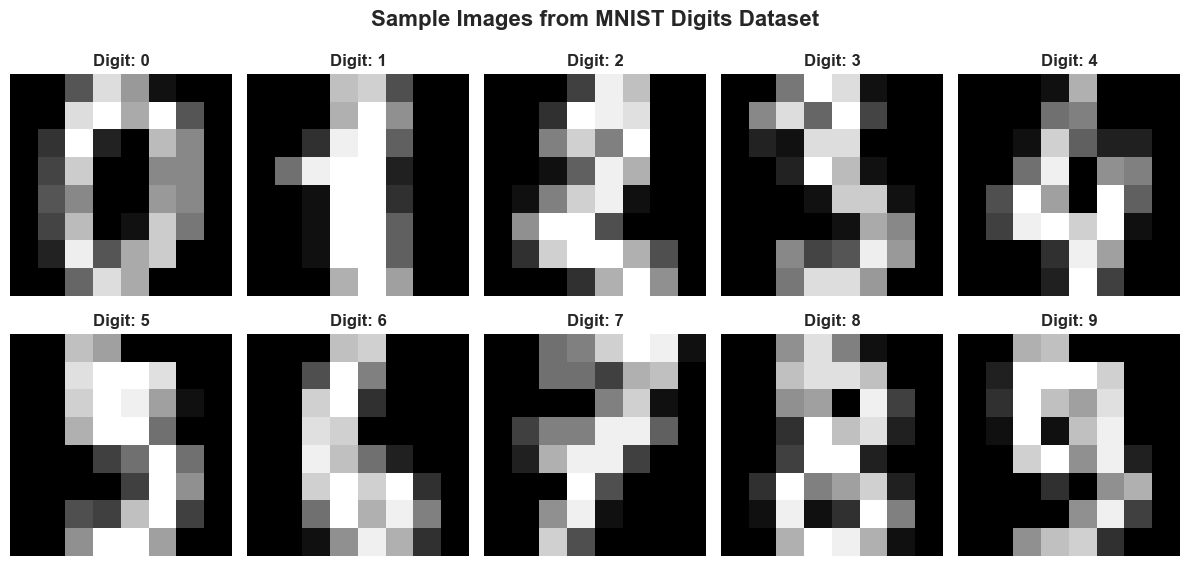


FINAL PERFORMANCE RANKING
SVM                 : 0.9917
KNN                 : 0.9833
Random Forest       : 0.9611
Logistic Regression : 0.9583
Decision Tree       : 0.8250

Visualization complete! All plots have been generated.


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, model_selection, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load MNIST digits dataset
print("Loading MNIST digits dataset...")
digits = datasets.load_digits()
X, y = digits.data, digits.target

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Classes: {np.unique(y)}")

# Reduce dimensions for visualization (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")

# Split data
X_train, X_test, y_train, y_test, X_pca_train, X_pca_test = model_selection.train_test_split(
    X, y, X_pca, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}
predictions = {}
probabilities = {}

print("\nTraining models...")

# Train, predict, and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    results[name] = acc
    predictions[name] = y_pred
    
    # Get prediction probabilities if available
    if hasattr(model, "predict_proba"):
        probabilities[name] = model.predict_proba(X_test)

print("\n" + "="*50)
print("MODEL ACCURACY RESULTS")
print("="*50)
for name, acc in results.items():
    print(f"{name:<20}: {acc:.4f}")

# 1. Accuracy Comparison Bar Plot
plt.figure(figsize=(12, 6))
model_names = list(results.keys())
accuracies = list(results.values())
colors = sns.color_palette("husl", len(model_names))

bars = plt.bar(model_names, accuracies, color=colors, alpha=0.8, edgecolor='black')
plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. PCA Visualization (Original Data)
plt.figure(figsize=(15, 10))

# PCA of test data colored by true labels
plt.subplot(2, 3, 1)
scatter = plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=y_test, cmap='tab10', alpha=0.7)
plt.title('PCA - True Labels', fontsize=12, fontweight='bold')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter, ticks=range(10))

# PCA visualizations for each model's predictions
for i, (name, y_pred) in enumerate(predictions.items(), 2):
    plt.subplot(2, 3, i)
    scatter = plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=y_pred, cmap='tab10', alpha=0.7)
    plt.title(f'PCA - {name}\n(Accuracy: {results[name]:.3f})', fontsize=10, fontweight='bold')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter, ticks=range(10))

plt.tight_layout()
plt.show()

# 3. t-SNE Visualizations
print("\nGenerating t-SNE visualizations...")

# Create t-SNE embedding (fixed parameter name)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_test_tsne = tsne.fit_transform(X_test)

plt.figure(figsize=(18, 12))

# t-SNE of test data colored by true labels
plt.subplot(2, 3, 1)
scatter = plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='tab10', alpha=0.7, s=30)
plt.title('t-SNE - True Labels', fontsize=12, fontweight='bold')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, ticks=range(10))

# t-SNE visualizations for each model's predictions
for i, (name, y_pred) in enumerate(predictions.items(), 2):
    plt.subplot(2, 3, i)
    scatter = plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_pred, cmap='tab10', alpha=0.7, s=30)
    plt.title(f't-SNE - {name}\n(Accuracy: {results[name]:.3f})', fontsize=10, fontweight='bold')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar(scatter, ticks=range(10))

plt.tight_layout()
plt.show()

# 4. Confusion Matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], 
                xticklabels=range(10), yticklabels=range(10))
    axes[i].set_title(f'{name}\n(Accuracy: {results[name]:.3f})', fontweight='bold')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Remove the extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

# 5. Detailed Performance Metrics
print("\n" + "="*60)
print("DETAILED CLASSIFICATION REPORTS")
print("="*60)

for name, y_pred in predictions.items():
    print(f"\n{name}:")
    print("-" * len(name))
    print(classification_report(y_test, y_pred))

# 6. Error Analysis - Misclassified Examples
print("\nGenerating error analysis...")

# Find misclassified examples for each model
fig, axes = plt.subplots(len(models), 10, figsize=(20, 2*len(models)))

for model_idx, (name, y_pred) in enumerate(predictions.items()):
    misclassified_mask = y_test != y_pred
    misclassified_indices = np.where(misclassified_mask)[0]
    
    # Show first 10 misclassified examples
    for img_idx in range(min(10, len(misclassified_indices))):
        idx = misclassified_indices[img_idx]
        image = X_test[idx].reshape(8, 8)
        
        axes[model_idx, img_idx].imshow(image, cmap='gray')
        axes[model_idx, img_idx].set_title(f'True: {y_test[idx]}\nPred: {y_pred[idx]}', 
                                          fontsize=8)
        axes[model_idx, img_idx].axis('off')
    
    # Fill remaining slots with empty plots
    for img_idx in range(len(misclassified_indices), 10):
        axes[model_idx, img_idx].axis('off')
    
    # Add model name as y-label
    axes[model_idx, 0].set_ylabel(name, rotation=90, va='center', fontweight='bold')

plt.suptitle('Misclassified Examples by Model', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 7. Sample Images from Dataset
print("\nShowing sample images from dataset...")
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    # Find first occurrence of each digit
    digit_idx = np.where(y == i)[0][0]
    image = X[digit_idx].reshape(8, 8)
    
    row, col = i // 5, i % 5
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_title(f'Digit: {i}', fontweight='bold')
    axes[row, col].axis('off')

plt.suptitle('Sample Images from MNIST Digits Dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 8. Model Performance Summary
performance_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': list(results.values())
}).sort_values('Accuracy', ascending=False)

print("\n" + "="*40)
print("FINAL PERFORMANCE RANKING")
print("="*40)
for i, row in performance_df.iterrows():
    print(f"{row['Model']:<20}: {row['Accuracy']:.4f}")

print("\nVisualization complete! All plots have been generated.")